# Implementación de un filtro espacial o morfológico

**Grupo 18 equipo 6:**
- Hector López Almazán
- Gregorio Ferrer Cebrian
- Jon Ánder Reche Urrutia
- Luís Cabello de los Cobos de Toro  
 
**Enlace Github:**
- https://github.com/gen1897/Percepcion/tree/main/Actividad2

## Abstract
Se ha implementado un filtro morfológico cuya principal utilidad es simplificar y conservar las características de objetos o formas en una imagen. En este caso se implementa el filtro conocido como Botton-Hat para corregir la iluminación de texto escaneado, y por tanto, que sea más legible.

## Algoritmos

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

from typing import Tuple

plt.rcParams['figure.figsize'] = 12, 12

La implementación del filtro Bottom-Hat es sencilla, se define como la inversa de la diferencia entre la operación de cierre de la imagen y la imagen original.

In [66]:
def closing(image: np.ndarray, s_elem: np.ndarray, n_iterations=1) -> np.ndarray:
    first_part = cv2.dilate(image, s_elem, iterations=n_iterations)
    
    return cv2.erode(first_part, s_elem, iterations=n_iterations)

def bottom_hat(image: np.ndarray, s_elem: np.ndarray, n_iterations=1) -> np.ndarray:
    first_part = closing(image, s_elem, n_iterations)
    
    return np.invert(first_part - image)

def create_kernel(size: Tuple[int, int]):
    kernel = np.zeros(size, dtype=np.uint8)
    # Obtiene la fila que representa la mitad del kernel
    radius = kernel.shape[0] // 2
    kernel[radius-1:radius+2, :] = 1

    return kernel

def plot_transformed_image(image: np.ndarray):
    data = plt.imread(image)
    new_img = bottom_hat(data, kernel, n_iterations=1)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(data)
    f.add_subplot(1,2, 2)
    plt.imshow(new_img)
    plt.show(block=True)

In [67]:
images = glob.glob('/content/drive/MyDrive/Percepción Computacional/Imagenes/*')

A continuación vamos a mostrar la elección del kernel, en este caso al querer resaltar imágenes con texto horizontal, hemos elegido un kernel formado por una línea horizontal de tamaño $15 \times 15$

In [70]:
kernel = create_kernel((15, 15))
kernel

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

Como corpus de imágenes de prueba hemos elegido 4 imágenes que provienen de fotos de hojas de texto. Se puede apreciar que en las imágenes originales, existe cierta oscuridad, por lo que el objetivo con esta transformación en resaltar el texto como harían las herramientas para escanear documentos.

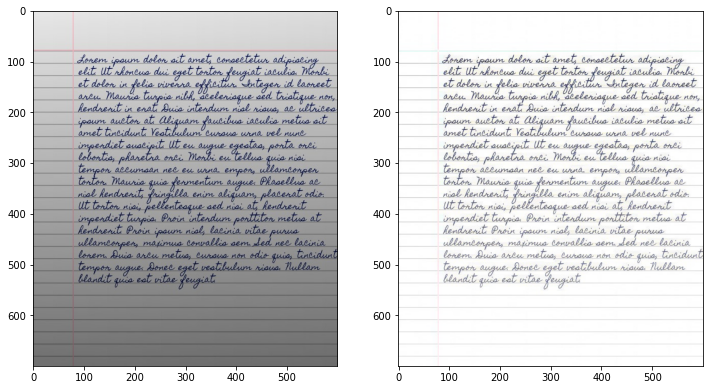

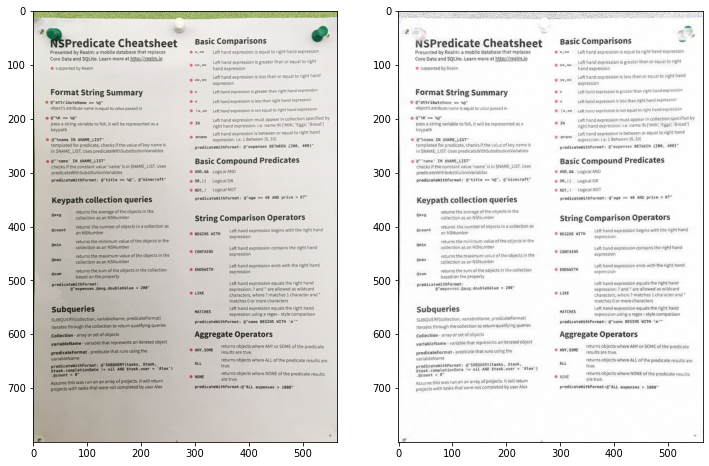

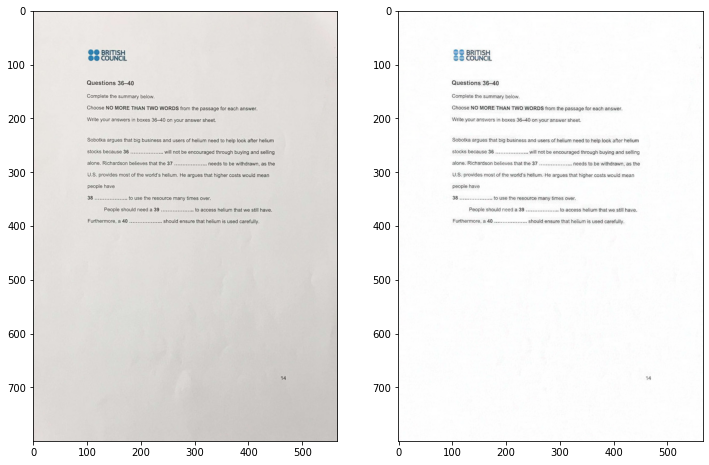

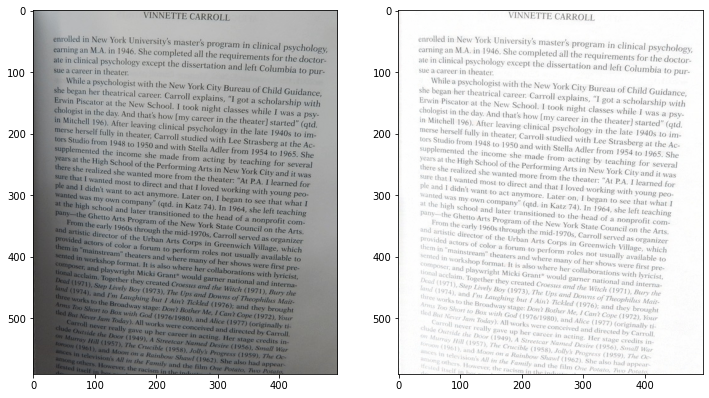

In [69]:
for image in images:
    plot_transformed_image(image)

## Conclusión
La transformación Botton- Hat, como se ha comprobado, es muy útil cuando nuestro Foreground es negro para corregir la iluminación del Background. Esta transformación depende del kernel que se le aplique. De manera empírica ( y con ayuda de <https://medium.com/hackernoon/an-introduction-to-morphological-operations-for-digital-image-text-classification-79cb14bab2d7>) se ha decido que sea horizontal, de la misma forma que lo es la dirección del texto en las imágenes tratadas, siendo el texto nuestro Foreground.

Los resultados obtenidos son bastante satisfactorios, pero si tomamos como ejemplo la última imagen, observamos que cuanto más oscuro sea el background, menos contraste habrá, por lo que el algoritmo funciona peor que con otras imágenes. 